In [1]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()

········


In [90]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT film.title, film.language_id, film.rental_rate, film.length, film.rating, film.special_features, COUNT(rental.rental_id) AS num_rentals
FROM film
LEFT JOIN inventory 
USING(film_id)
LEFT JOIN rental 
USING(inventory_id)
GROUP BY film.film_id;'''

In [91]:
data = pd.read_sql_query(query, engine)

In [92]:
data

,title,language_id,rental_rate,length,rating,special_features,num_rentals
0,ACADEMY DINOSAUR,1,0.99,86,PG,"Deleted Scenes,Behind the Scenes",23
1,ACE GOLDFINGER,1,4.99,48,G,"Trailers,Deleted Scenes",7
2,ADAPTATION HOLES,1,2.99,50,NC-17,"Trailers,Deleted Scenes",12
3,AFFAIR PREJUDICE,1,2.99,117,G,"Commentaries,Behind the Scenes",23
4,AFRICAN EGG,1,2.99,130,G,Deleted Scenes,12
...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,1,0.99,183,G,"Trailers,Behind the Scenes",7
996,YOUTH KICK,1,0.99,179,NC-17,"Trailers,Behind the Scenes",6
997,ZHIVAGO CORE,1,0.99,105,NC-17,Deleted Scenes,9
998,ZOOLANDER FICTION,1,2.99,101,R,"Trailers,Deleted Scenes",17


In [93]:
query2= '''SELECT DISTINCT f.title AS film_title,
CASE
WHEN IFNULL(i.inventory_id, 0) = 0 THEN 'NOT available'
ELSE 'Available'
END AS availability_status
FROM sakila.film AS f
LEFT JOIN sakila.inventory AS i
ON f.film_id = i.film_id;'''

data1 = pd.read_sql_query(query2, engine)
data1.head()

,film_title,availability_status
0,ACADEMY DINOSAUR,Available
1,ACE GOLDFINGER,Available
2,ADAPTATION HOLES,Available
3,AFFAIR PREJUDICE,Available
4,AFRICAN EGG,Available


In [94]:
data1

,film_title,availability_status
0,ACADEMY DINOSAUR,Available
1,ACE GOLDFINGER,Available
2,ADAPTATION HOLES,Available
3,AFFAIR PREJUDICE,Available
4,AFRICAN EGG,Available
...,...,...
995,YOUNG LANGUAGE,Available
996,YOUTH KICK,Available
997,ZHIVAGO CORE,Available
998,ZOOLANDER FICTION,Available


In [95]:
dataf = pd.concat([data, data1['availability_status']], axis=1)
dataf

,title,language_id,rental_rate,length,rating,special_features,num_rentals,availability_status
0,ACADEMY DINOSAUR,1,0.99,86,PG,"Deleted Scenes,Behind the Scenes",23,Available
1,ACE GOLDFINGER,1,4.99,48,G,"Trailers,Deleted Scenes",7,Available
2,ADAPTATION HOLES,1,2.99,50,NC-17,"Trailers,Deleted Scenes",12,Available
3,AFFAIR PREJUDICE,1,2.99,117,G,"Commentaries,Behind the Scenes",23,Available
4,AFRICAN EGG,1,2.99,130,G,Deleted Scenes,12,Available
...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,1,0.99,183,G,"Trailers,Behind the Scenes",7,Available
996,YOUTH KICK,1,0.99,179,NC-17,"Trailers,Behind the Scenes",6,Available
997,ZHIVAGO CORE,1,0.99,105,NC-17,Deleted Scenes,9,Available
998,ZOOLANDER FICTION,1,2.99,101,R,"Trailers,Deleted Scenes",17,Available


In [96]:
query3 = '''SELECT film.title,
MAX(CASE WHEN rental.rental_date >= '2005-05-01' AND rental.rental_date < '2005-06-01' THEN 'True' ELSE 'False' END) AS rented_in_may
FROM sakila.film
LEFT JOIN sakila.inventory 
ON film.film_id = inventory.film_id
LEFT JOIN sakila.rental
ON inventory.inventory_id = rental.inventory_id
GROUP BY film.title;'''

In [97]:
data2 = pd.read_sql_query(query3, engine)

In [98]:
data2.head()

,title,rented_in_may
0,ACADEMY DINOSAUR,True
1,ACE GOLDFINGER,False
2,ADAPTATION HOLES,True
3,AFFAIR PREJUDICE,True
4,AFRICAN EGG,True


In [99]:
dataf = pd.concat([dataf, data2['rented_in_may']], axis=1)
dataf

,title,language_id,rental_rate,length,rating,special_features,num_rentals,availability_status,rented_in_may
0,ACADEMY DINOSAUR,1,0.99,86,PG,"Deleted Scenes,Behind the Scenes",23,Available,True
1,ACE GOLDFINGER,1,4.99,48,G,"Trailers,Deleted Scenes",7,Available,False
2,ADAPTATION HOLES,1,2.99,50,NC-17,"Trailers,Deleted Scenes",12,Available,True
3,AFFAIR PREJUDICE,1,2.99,117,G,"Commentaries,Behind the Scenes",23,Available,True
4,AFRICAN EGG,1,2.99,130,G,Deleted Scenes,12,Available,True
...,...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,1,0.99,183,G,"Trailers,Behind the Scenes",7,Available,False
996,YOUTH KICK,1,0.99,179,NC-17,"Trailers,Behind the Scenes",6,Available,False
997,ZHIVAGO CORE,1,0.99,105,NC-17,Deleted Scenes,9,Available,True
998,ZOOLANDER FICTION,1,2.99,101,R,"Trailers,Deleted Scenes",17,Available,True


In [100]:
dataf.isna().sum()

title                  0
language_id            0
rental_rate            0
length                 0
rating                 0
special_features       0
num_rentals            0
availability_status    0
rented_in_may          0
dtype: int64

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sorig\AppData\Local\Temp\ipykernel_6252\4268366014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataf.corr()


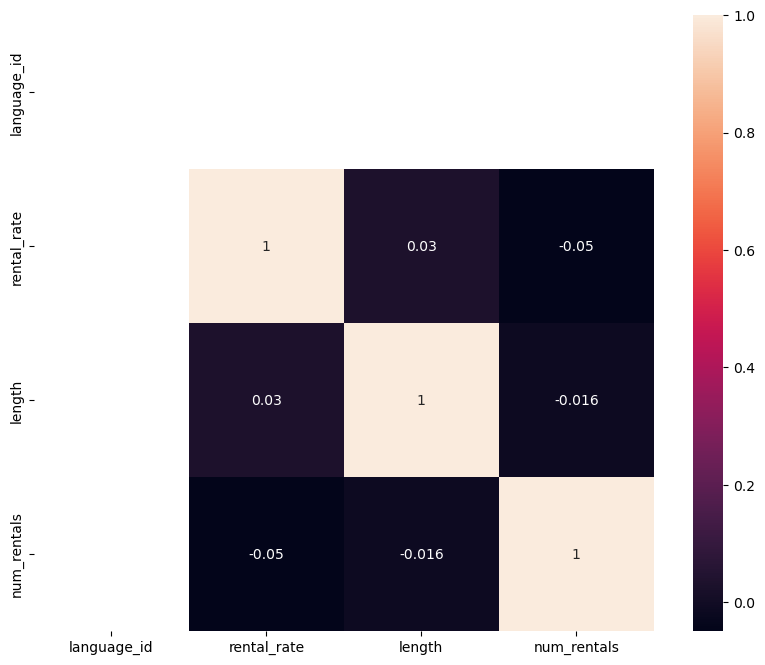

In [102]:
corr_matrix=dataf.corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [103]:
dataf['language_id'].unique()

array([1], dtype=int64)

In [104]:
y = dataf['rented_in_may']
X = dataf.drop(['rented_in_may','language_id', 'title'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [65]:
X

,rental_rate,length,rating,special_features,num_rentals,availability_status
0,0.99,86,PG,"Deleted Scenes,Behind the Scenes",23,Available
1,4.99,48,G,"Trailers,Deleted Scenes",7,Available
2,2.99,50,NC-17,"Trailers,Deleted Scenes",12,Available
3,2.99,117,G,"Commentaries,Behind the Scenes",23,Available
4,2.99,130,G,Deleted Scenes,12,Available
...,...,...,...,...,...,...
995,0.99,183,G,"Trailers,Behind the Scenes",7,Available
996,0.99,179,NC-17,"Trailers,Behind the Scenes",6,Available
997,0.99,105,NC-17,Deleted Scenes,9,Available
998,2.99,101,R,"Trailers,Deleted Scenes",17,Available


In [66]:
from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_num.columns)
X_train_norm

,rental_rate,length,num_rentals
0,1.0,0.769784,0.235294
1,0.0,0.151079,0.705882
2,0.5,0.258993,0.588235
3,1.0,0.223022,0.852941
4,0.0,0.733813,0.470588
...,...,...,...
795,0.0,0.151079,0.176471
796,0.0,0.683453,0.558824
797,1.0,0.467626,0.617647
798,1.0,0.906475,0.411765


In [73]:
X_train_cat = X_train.select_dtypes(include = object)

In [110]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded = encoder.transform(X_train_cat).toarray()
print(encoded)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


In [111]:
onehot_encoded = pd.DataFrame(encoded)
onehot_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
797,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
X_train_transformed = np.concatenate([X_train_norm, onehot_encoded], axis=1)

In [113]:
X_train_transformed

array([[1.        , 0.76978417, 0.23529412, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15107914, 0.70588235, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.25899281, 0.58823529, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.4676259 , 0.61764706, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.90647482, 0.41176471, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.31654676, 0.44117647, ..., 0.        , 1.        ,
        0.        ]])

In [114]:
X_train_transformed.shape

(800, 22)

In [115]:
from sklearn.linear_model import LogisticRegression

In [117]:
classification = LogisticRegression()
classification.fit(X_train_transformed, y_train)

LogisticRegression()

In [119]:

X_test_num  = X_test.select_dtypes(include = np.number)
X_test_cat  = X_test.select_dtypes(include = object)

In [120]:
X_test_num.head()

,rental_rate,length,num_rentals
977,0.99,98,9
15,2.99,180,14
56,2.99,90,21
801,2.99,132,0
747,0.99,109,30


In [121]:
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head(30)

,rental_rate,length,num_rentals
0,0.0,0.374101,0.264706
1,0.5,0.964029,0.411765
2,0.5,0.316547,0.617647
3,0.5,0.618705,0.000000
4,0.0,0.453237,0.882353
5,0.0,0.028777,0.529412
6,0.5,0.172662,0.529412
7,1.0,0.338129,0.617647
8,0.0,0.640288,0.470588
9,1.0,0.618705,0.470588


In [129]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test.head()

,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",availability_status_NOT available
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [130]:
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)
X_test_treated

,rental_rate,length,num_rentals,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes",...,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",availability_status_NOT available
0,0.0,0.374101,0.264706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.964029,0.411765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.316547,0.617647,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.618705,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.453237,0.882353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.402878,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
196,0.5,0.446043,0.558824,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.5,0.273381,0.764706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.294964,0.617647,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
predictions = classification.predict(X_test_treated)
predictions
classification.score(X_test_treated, y_test)

C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.765

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 30,  32],
       [ 15, 123]], dtype=int64)

In [134]:
(30+123)/len(predictions)

0.765